In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas
import numpy

In [2]:
xPath = r"D:\X.csv"
yPath = r"D:\y.csv"
dataX = pandas.read_csv(xPath)
dataY = pandas.read_csv(yPath)
# dataX = dataX.to_numpy()
# dataY = dataY.to_numpy()

In [3]:
trainX = numpy.reshape(dataX.to_numpy(), [dataX.shape[0], dataX.shape[1]])
trainY = numpy.reshape(dataY.to_numpy(), [trainX.shape[0]])
trainY = tf.one_hot(trainY, 2)

In [4]:
    model = keras.Sequential(
        [
            layers.Dense(64, activation='relu'),
            layers.Dense(2, activation='softmax')
        ]
    )

    log_dir="tensorboard_log"
    tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(trainX, trainY,batch_size=128,epochs=2, validation_split=0.25, callbacks=[tensorboard])

In [6]:
# model.fit(trainX,trainY,batch_size=128,epochs=2, validation_split=0.25, callbacks=[tensorboard])

Epoch 1/2
3461/3461 [==============================] - 18s 5ms/step - loss: 39.2678 - accuracy: 0.9419 - val_loss: 14.5874 - val_accuracy: 0.9453
Epoch 2/2
3461/3461 [==============================] - 18s 5ms/step - loss: 18.8795 - accuracy: 0.9450 - val_loss: 7.6567 - val_accuracy: 0.9565


In [7]:
oriTestY = model.predict(trainX)
oriTestY = numpy.argmax(oriTestY,axis=1)

In [8]:
print(1 - sum(oriTestY != dataY.reshape([-1]))/dataY.shape[0])

0.9517153791445118


In [9]:
evalXPath = r"D:\X_test.csv"
evalX = pandas.read_csv(evalXPath)

In [10]:
evalX = evalX.to_numpy()

In [11]:
predictY = model.predict(evalX)

In [12]:
predictY = numpy.argmax(predictY, axis=1)

In [13]:
id = range(3663549,3663549+predictY.shape[0])

In [14]:
id = numpy.array(id)

In [15]:
evalResult = pandas.DataFrame({"TransactionID": id, "isFraud": predictY})

In [16]:
evalResult.to_csv('result.csv', index=False, sep=',')

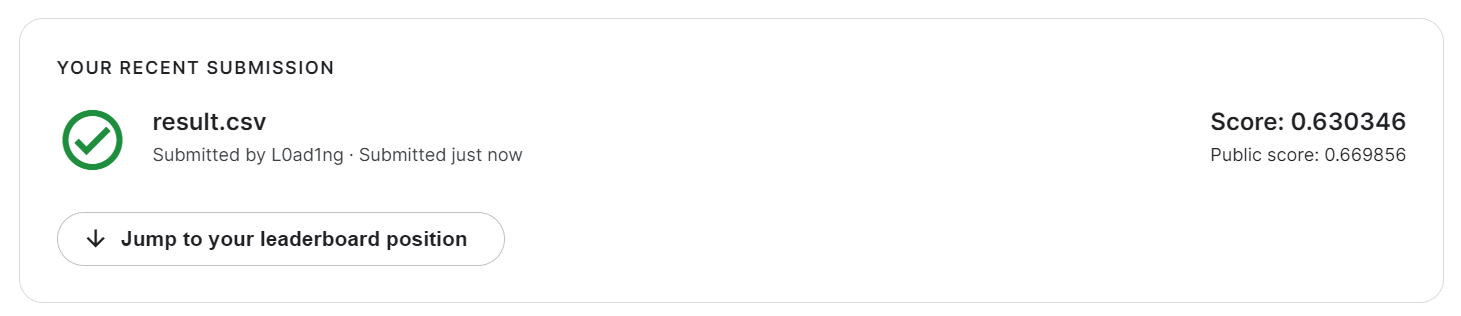